WeatherPy

Observations:
(1)  There is a distinct trend of temperatures rising as latitudes get closer to the equator, regardless of the fact that our data set includes temperaures from varying time zones (day vs night) as well as varying seasons in the temperate regions.
(2)  I expected cloud cover to increase as latitudes approached the equator, but this was not supported by the plot of "cloudiness" values.  My data set likely trends towards coastal regions of lower altitudes (see WhyCitiPy for full explaination), and that this may have impacted any trends in cloud cover I anticipated.
(3)  Humidity trends match anticipated behavior as latitudes approach the equator: high humidity at the equator (rainforest climates), a noticeable decrease in humidity around the 20 to 40-degree latitudes (desert climates), and a mix of humidity values moving throughout the temperate climates.
(4)  Wind speeds shows little pattern versus latitude except that the highest speeds are at greater than 50 degrees from the equator.

In [1]:
#Import dependencies
%matplotlib inline
import json
import requests
from config import api_key
import openweathermapy.core as owm
import pandas as pd
from citipy import citipy
import random
import random as uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#Define a few basic parameters for the final presentation
now = datetime.datetime.now()
now = now.strftime("%m-%d-%Y")

def percent(x):
    return "{:.2f}%".format(x)

In [3]:
#Prepare settings for calls to OpenWeatherMap. "Cnt" will return only one hour from the hourly weather forecast.
settings = {"APPID": api_key,
            "units": "imperial",
            "lang": "EN",
            "cnt":1}

In [14]:
#Deicide how many unique cities you wish to compare
desired_dataset_size = 500

Generate Cities List

In [5]:
#Prepare to store a list of unique cities
cities = []
def remove_duplicates(x):
    return list(set(x))

#Generate random coordinates, pass through CitiPy for city names, store uniques.  
#Total cities should exceed desired OpenWeatherMap calls by at least 16%, the "not found" rate based on several runs
x = 0
while x < (desired_dataset_size*1.20):
    lat = float(random.randrange(-9000, 9000))/100
    long = float(random.randrange(-18000, 18000))/100
    city = citipy.nearest_city(lat, long)
    cities.append(city.city_name)
    cities = remove_duplicates(cities)
    x  = len(cities)

Perform API calls

In [6]:
#Prepare to store info on unique cities
names = []
ids = []
temps = []
lats = []
winds = []
clouds = []
humids = []
countries = []
url_cities = []

#Announce print log
print("------------------------------------------------------------------------------")
print("Beginning Data Retrieval")
print("------------------------------------------------------------------------------")


#loop through unique cities, calling on OpenWeatherMap, until desired number of sucessful returns is met 
y = 1
for city in cities:
    if len(names) < desired_dataset_size:
        #Test for availability on OpenWeatherMap
        try:
            weather = owm.get_forecast_hourly(city,**settings)
            #Get info for city and store it
            countries.append(weather.meta("city.country"))
            names.append(weather.meta("city.name"))
            ids.append(weather.meta("city.id"))
            lats.append(weather.meta("city.coord.lat"))
            temps.append(weather[0]("main.temp"))
            winds.append(weather[0]("wind.speed"))
            clouds.append(weather[0]("clouds.all"))
            humids.append(weather[0]("main.humidity"))
            #Reformat city names for URL output purposes
            url_city=city.replace(" ", "&")
            url_cities.append(url_city)
            #Run Print Log
            print("Making request number: "+str(y)+" for ID: "+str(weather.meta("city.id"))+" Name: "+weather.meta("city.name")+", "+weather.meta("city.country"))
            print("URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID="+api_key+"&q="+url_city)
            y = y + 1
        #If OpenWeatherMap returns city "not found", do nothing with this city and continue loop
        except:
            continue
    #Break loop once len(names) reaches desired number of returns
    else:
        break
#Close print log
print("-------------------------------------------------------------------------------")
print("Data retrieval complete")
print("-------------------------------------------------------------------------------")
    

------------------------------------------------------------------------------
Beginning Data Retrieval
------------------------------------------------------------------------------
Making request number: 1 for ID: 3081752 Name: Wladyslawowo, PL
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=wladyslawowo
Making request number: 2 for ID: 1528998 Name: Yumen, CN
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=yumen
Making request number: 3 for ID: 1799869 Name: Nanning, CN
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=nanning
Making request number: 4 for ID: 3661980 Name: Tamandare, BR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=tamandare
Making request number: 5 for ID: 3468720 Name: Buritizeiro, BR
URL: http://api.

Making request number: 44 for ID: 3873441 Name: Los Rastrojos, CL
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=los&rastrojos
Making request number: 45 for ID: 513328 Name: Ozinki, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=ozinki
Making request number: 46 for ID: 463838 Name: Zelenoborskiy, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=zelenoborskiy
Making request number: 47 for ID: 5826559 Name: Green River, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=green&river
Making request number: 48 for ID: 1266330 Name: Kokrajhar, IN
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=kokrajhar
Making request number: 49 for ID: 5456049 Name: Aztec

Making request number: 89 for ID: 1176048 Name: Jati, PK
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=jati
Making request number: 90 for ID: 2337542 Name: Naze, NG
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=naze
Making request number: 91 for ID: 2338660 Name: Yaan, NG
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=yaan
Making request number: 92 for ID: 5353775 Name: Grass Valley, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=grass&valley
Making request number: 93 for ID: 2126710 Name: Beringovskiy, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=beringovskiy
Making request number: 94 for ID: 3704327 Name: Meteti, PA
URL: http://api.openweat

Making request number: 134 for ID: 6145890 Name: Shelburne, CA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=shelburne
Making request number: 135 for ID: 3387082 Name: Tabira, BR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=tabira
Making request number: 136 for ID: 2079582 Name: Alyangula, AU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=alyangula
Making request number: 137 for ID: 3595803 Name: Escuintla, GT
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=escuintla
Making request number: 138 for ID: 3372707 Name: Ribeira Grande, PT
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=ribeira&grande
Making request number: 139 for ID: 877747 Name: Mtwara, 

Making request number: 178 for ID: 2065594 Name: Mount Isa, AU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=mount&isa
Making request number: 179 for ID: 4167694 Name: Panama City, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=panama&city
Making request number: 180 for ID: 3031871 Name: Veraval, FR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=veraval
Making request number: 181 for ID: 2399001 Name: Mayumba, GA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=mayumba
Making request number: 182 for ID: 2374688 Name: Bolama, GW
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=bolama
Making request number: 183 for ID: 286987 Name: Nizwa, OM
URL: http://

Making request number: 222 for ID: 5681948 Name: Fallon, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=fallon
Making request number: 223 for ID: 5849996 Name: Lahaina, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=lahaina
Making request number: 224 for ID: 694919 Name: Sakhnovshchyna, UA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=sakhnovshchyna
Making request number: 225 for ID: 2019309 Name: Neryungri, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=neryungri
Making request number: 226 for ID: 5746545 Name: Portland, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=portland
Making request number: 227 for ID: 1131462 Name: Uruzgan, AF
UR

Making request number: 266 for ID: 3573374 Name: The Valley, AI
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=the&valley
Making request number: 267 for ID: 1283285 Name: Jumla, NP
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=jumla
Making request number: 268 for ID: 3423146 Name: Ilulissat, GL
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=ilulissat
Making request number: 269 for ID: 1641899 Name: Labuhan, ID
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=labuhan
Making request number: 270 for ID: 1494482 Name: Polunochnoye, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=polunochnoye
Making request number: 271 for ID: 2508813 Name: Adrar, DZ
URL: 

Making request number: 311 for ID: 2175403 Name: Bluff, AU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=bluff
Making request number: 312 for ID: 107304 Name: Buraydah, SA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=buraydah
Making request number: 313 for ID: 3855065 Name: General Roca, AR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=general&roca
Making request number: 314 for ID: 2090021 Name: Namatanai, PG
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=namatanai
Making request number: 315 for ID: 1498161 Name: Muzhi, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=muzhi
Making request number: 316 for ID: 2610343 Name: Vestmanna, FO
URL: http:

Making request number: 357 for ID: 889215 Name: Kariba, ZW
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=kariba
Making request number: 358 for ID: 2084442 Name: Vanimo, PG
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=vanimo
Making request number: 359 for ID: 3839307 Name: Rawson, AR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=rawson
Making request number: 360 for ID: 3456248 Name: Nortelandia, BR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=nortelandia
Making request number: 361 for ID: 5859699 Name: College, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=college
Making request number: 362 for ID: 1006984 Name: East London, ZA
URL: http://ap

Making request number: 402 for ID: 581080 Name: Arkadak, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=arkadak
Making request number: 403 for ID: 1633419 Name: Padang, ID
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=padang
Making request number: 404 for ID: 712969 Name: Dachnoye, UA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=dachnoye
Making request number: 405 for ID: 2155858 Name: Nambucca Heads, AU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=nambucca&heads
Making request number: 406 for ID: 6320062 Name: Vila Velha, BR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=vila&velha
Making request number: 407 for ID: 3427761 Name: Tigre, AR
URL

Making request number: 446 for ID: 2101169 Name: Aitape, PG
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=aitape
Making request number: 447 for ID: 2136825 Name: Isangel, VU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=isangel
Making request number: 448 for ID: 2264923 Name: Peniche, PT
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=peniche
Making request number: 449 for ID: 2281120 Name: Tabou, CI
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=tabou
Making request number: 450 for ID: 4501427 Name: Port Elizabeth, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=port&elizabeth
Making request number: 451 for ID: 2208248 Name: Kaitangata, NZ
URL: htt

Making request number: 490 for ID: 1538641 Name: Kedrovyy, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=kedrovyy
Making request number: 491 for ID: 3621278 Name: Tilaran, CR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=tilaran
Making request number: 492 for ID: 2025456 Name: Chernyshevskiy, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=chernyshevskiy
Making request number: 493 for ID: 933290 Name: Mookane, BW
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=mookane
Making request number: 494 for ID: 2156643 Name: Mount Gambier, AU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=034bd27b501cbbba0e407d1f36ae033a&q=mount&gambier
Making request number: 495 for ID: 2173323 Name: Bund

City DataFrame

In [15]:
#Build a DataFrame from info collected in loop 
data = {"City Name":names,
        "City ID":ids,
        "Temperature":temps,
        "Latitude":lats,
        "Cloudiness": clouds,
        "Wind Speeds": winds,
        "Humidity": humids,
        "Country":countries
        }
cities_df = pd.DataFrame(data = data)
cities_df["Cloudiness"] = cities_df["Cloudiness"].apply(percent)
cities_df["Humidity"] = cities_df["Humidity"].apply(percent)
cities_df.head()

,City ID,City Name,Cloudiness,Country,Humidity,Latitude,Temperature,Wind Speeds
0,3081752,Wladyslawowo,88.00%,PL,100.00%,54.7909,30.87,15.73
1,1528998,Yumen,8.00%,CN,38.00%,40.2917,36.09,13.49
2,1799869,Nanning,24.00%,CN,92.00%,22.8326,64.33,4.43
3,3661980,Tamandare,80.00%,BR,79.00%,-8.2789,75.13,5.66
4,3468720,Buritizeiro,12.00%,BR,66.00%,-17.3668,68.99,11.14


In [16]:
#Confirm final count of unique cities
len(cities_df["City Name"])

500

In [17]:
#Export to csv file
cities_df.to_csv("WeatherPy.csv", encoding='utf-8', index = False)

Latitude vs Temperature

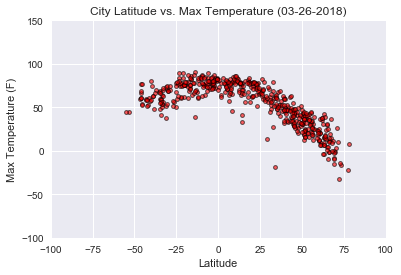

In [18]:
#Set data
x = lats
y = temps

#Set parameters
sns.set()
plt.xlim(-100,100)
plt.ylim(-100,150)
plt.title("City Latitude vs. Max Temperature ("+now+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Plot
plt.scatter(x, y, s=15,c="red",alpha=0.6, linewidth=1,edgecolors="black")

Latitude vs Wind Speed

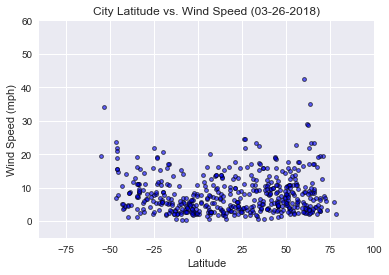

In [19]:
#Set data
x = lats
y = winds

#Set parameters
sns.set()
plt.xlim(-90,100)
plt.ylim(-5,60)
plt.title("City Latitude vs. Wind Speed ("+now+")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Plot
plt.scatter(x, y,s=15,c="blue",alpha=0.6, linewidth=1,edgecolors="black")

Latitude vs Cloudiness

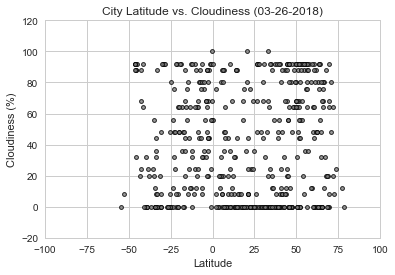

In [20]:
#Set data
x = lats
y = clouds

#Set parameters
sns.set_style("whitegrid")
plt.xlim(-100,100)
plt.ylim(-20,120)
plt.title("City Latitude vs. Cloudiness ("+now+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Plot
plt.scatter(x, y,s=15, c="grey",alpha=0.8, linewidth=1,edgecolors="black")

Latitude vs Humidity

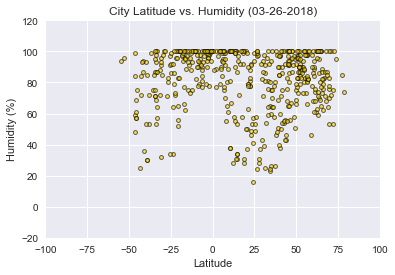

In [21]:
#Set data
x = lats
y = humids

#Set parameters
sns.set()
plt.xlim(-100,100)
plt.ylim(-20,120)
plt.title("City Latitude vs. Humidity ("+now+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Plot
plt.scatter(x, y,s=15, c="gold",alpha=0.6, linewidth=1,edgecolors="black") 